<a href="https://colab.research.google.com/github/manikanta70137/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection%5BXGBoost%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<div style='text-align: center;'>
    <h1>Credit Card Fraud Detection</h1>
    <h4>Using XGBoost</h4>
</div>

<div style='text-align: right;'>
    <p style="font-style: italic;">Created by <strong>Manikanta Chundu</strong></p>
</div>

---


# **Step 1: Import Libraries**

In this step, we are importing essential libraries that will be used throughout the credit card fraud detection project. Each library serves specific purposes, including data manipulation, visualization, machine learning model building, and evaluation.

**1.Data Manipulation:**
```
import pandas as pd
```
**pandas:** A powerful data manipulation library used to load, manipulate, and analyze datasets. With pandas, we can easily handle large datasets, filter rows or columns, and perform aggregation and statistical operations.

**2.Data Visualization:**
```
import matplotlib.pyplot as plt
import seaborn as sns
```

**matplotlib.pyplot:** A widely-used plotting library for Python, matplotlib allows us to create static, animated, and interactive plots. It is used for plotting the distribution of data, including fraudulent and non-fraudulent transactions.

**seaborn:** Built on top of matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics, especially useful for visualizing class distributions.

**3.Deep Learning Framework:**
```
import tensorflow as tf
```
**tensorflow:** An open-source machine learning framework, tensorflow is used to build and train deep learning models, such as the LSTM network for fraud detection. The framework provides high-level functions to design and train neural networks efficiently.

**4.Data Distribution Analysis:**
```
from collections import Counter
```
**Counter from collections:** This is a convenient class to count occurrences of elements. We use it to check the balance of classes (fraudulent vs. non-fraudulent transactions) after resampling.

**5.Machine Learning Preprocessing and Model Evaluation:**
```
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
```
**train_test_split from sklearn.model_selection:** This function splits the dataset into training and testing sets, an essential step in evaluating model performance. A typical split is 80% training data and 20% test data.

**StandardScaler and PowerTransformer from sklearn.preprocessing:**

*StandardScaler:* Standardizes features by removing the mean and scaling to unit variance. This is important for ensuring that features contribute equally to the model.

*PowerTransformer:* A transformation technique to make data more Gaussian-like, which can help models better capture patterns, especially when dealing with skewed features.

**6.Handling Class Imbalance:**
```
from imblearn.over_sampling import RandomOverSampler
```
**RandomOverSampler from imblearn.over_sampling:** A method to balance datasets by oversampling the minority class (fraudulent transactions). This helps address the imbalance, making the model less biased towards non-fraudulent transactions.

**7.Model Evaluation:**

**Accuracy_score**
```
from sklearn.metrics import accuracy_score
```
The accuracy_score function calculates the ratio of correctly predicted observations to the total observations. It is a fundamental metric used in classification problems, including binary classification tasks like fraud detection.
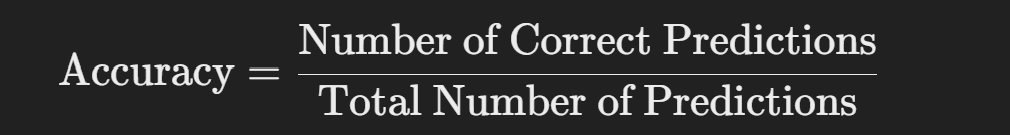

**confusion_matrix and classification_report from sklearn.metrics:**
```
from sklearn.metrics import confusion_matrix, classification_report
```
These metrics evaluate model performance by providing insight into its accuracy, precision, recall, and F1 score. A confusion matrix shows how well the model distinguishes between fraud and non-fraud cases.

**8.Importing XGBoost**
```
import xgboost as xgb
```
The xgboost library provides an optimized implementation of the gradient boosting framework, which is particularly effective for classification and regression tasks. It stands for Extreme Gradient Boosting, and it's designed to be efficient, flexible, and portable.

By importing these libraries and modules, we establish a foundation for loading, preprocessing, modeling, and evaluating the credit card fraud detection dataset, ensuring a comprehensive workflow from data exploration to final performance assessment.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb

# **Step 2: Load and Explore Dataset**

This initial step focuses on loading the dataset, checking class distribution, calculating the percentage shares of normal and fraud transactions, and visualizing the distribution.

**1.Load Dataset:**
```
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
```
Here, we load the dataset from a CSV file containing credit card transaction records. This dataset typically includes various anonymized features representing transaction characteristics, along with a target column ('Class') that indicates whether a transaction is fraudulent (1) or not (0).

**2.Check Class Distribution:**
```
classes = df['Class'].value_counts()
print(classes)
```
Checking the distribution of 'Class' values helps us understand the balance between fraudulent (1) and non-fraudulent (0) transactions. Fraud detection datasets are often highly imbalanced, with a much smaller percentage of fraudulent transactions, which can challenge model performance.

**3.Calculate Percentage Shares of Normal and Fraud Transactions:**
```
normal_share = round((classes[0] / df['Class'].count() * 100), 2)
fraud_share = round((classes[1] / df['Class'].count() * 100), 2)
print("Normal share =", normal_share)
print("Fraud share =", fraud_share)
```
**Normal Share:** Percentage of non-fraudulent transactions in the dataset.

**Fraud Share:** Percentage of fraudulent transactions.

These percentages provide insights into the dataset's imbalance and help us understand how skewed the data is, which is essential for deciding on further data preprocessing steps like resampling.

**4.Plot Class Distribution:**
```
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()
```
This plot visually represents the distribution between fraudulent and non-fraudulent transactions, offering a clearer understanding of the dataset’s imbalance.

The visualization helps in identifying the data skew, which informs decisions about methods for handling the imbalance, such as oversampling or undersampling.

**Importance of Understanding Class Distribution**

Class distribution analysis is critical, as an imbalanced dataset may lead to a biased model, predicting non-fraud more accurately simply due to its prevalence. Recognizing this early allows us to take corrective measures, enhancing the model’s ability to detect fraud in highly skewed data.

Class
0    284315
1       492
Name: count, dtype: int64
Normal share = 99.83
Fraud share = 0.17


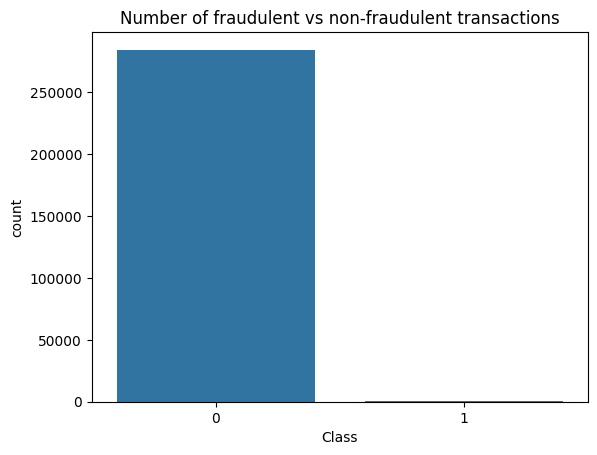

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Check class distribution
classes = df['Class'].value_counts()
print(classes)

# Calculate percentage shares of normal and fraud transactions
normal_share = round((classes[0] / df['Class'].count() * 100), 2)
fraud_share = round((classes[1] / df['Class'].count() * 100), 2)
print("Normal share =", normal_share)
print("Fraud share =", fraud_share)

# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()

# **Step 3: Defining Features and Target, and Splitting Data**

In this step, we prepare the dataset for model training by defining the features (predictor variables) and the target (outcome variable), then splitting the data into training and test sets.

**1.Define Features (X) and Target (y):**
```
X = df.drop(['Class'], axis=1)
y = df['Class']
```
**Features (X):** These are the variables the model will use to predict fraud. Here, we drop the 'Class' column from the dataset to retain only the features, which include transaction-related data.

**Target (y):**This is the variable we want to predict — in this case, 'Class', where typically 0 represents non-fraudulent transactions and 1 represents fraudulent ones.

**2.Split Data into Training and Test Sets:**
```
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
```
**Training Set (80%):** This subset of data will be used by the model to learn patterns and relationships in the data. By using 80% of the data for training, we allow the model sufficient data to learn effectively.

**Test Set (20%):** This subset is used to evaluate the model's performance on unseen data. Testing on separate data allows us to gauge the model's generalization capability.

**Random State:** Setting random_state=100 ensures the split is reproducible. Each time the code runs, the split will be the same, allowing for consistent results during development and testing.

**3.Importance of Train-Test Split:**

**Avoiding Overfitting:** Training on a separate subset ensures that the model doesn't simply memorize the data, allowing us to better assess how well it generalizes to new transactions.

**Reliable Evaluation:** A separate test set provides an unbiased evaluation metric since the model has not seen this data before. This is crucial for understanding the model's real-world performance.

By setting up the features, target, and a balanced train-test split, this step establishes a foundation for building, training, and evaluating a robust credit card fraud detection model.

In [3]:
# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# **Step 4: Standardizing the 'Amount' Feature**

The transaction amount feature in the credit card fraud detection dataset often varies widely, making it necessary to standardize it. Standardizing this feature ensures that its scale does not disproportionately influence the model's learning process, as many machine learning models are sensitive to the scale of numerical features.

Here's how we standardize the 'Amount' feature:

**1.Initialize the Scaler:**
```
scaler = StandardScaler()
```
StandardScaler scales features to have a mean of zero and a standard deviation of one. This normalization helps the model treat 'Amount' on a comparable scale to other features, allowing for better training convergence and improved performance.

**2.Fit on Training Data and Transform:**
```
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
```
The fit_transform method first calculates the mean and standard deviation of 'Amount' in the training data, then uses these statistics to standardize the values in the training set.

It's essential to fit the scaler only on the training data to prevent data leakage. By doing so, the scaling is based only on patterns found in the training data, ensuring fair evaluation on the test set.

**3.Transform Test Data:**
```
X_test['Amount'] = scaler.transform(X_test[['Amount']])
```
After fitting the scaler on the training data, we apply the same transformation to the test data using transform. This ensures that the test set values are adjusted based on the same parameters (mean and standard deviation) as the training data, enabling consistent scaling across both sets.

**4.Benefits of Standardization:**

**Improved Model Convergence:** Many models, especially neural networks, benefit from standardized inputs, as it helps them converge faster and reach optimal performance.

**Balanced Feature Contribution:** Standardizing ensures that 'Amount' does not dominate or be ignored by the model due to its potentially large scale differences with other features.

**Reduces Sensitivity to Outliers:** Scaling helps minimize the impact of extreme values in 'Amount', which might otherwise bias the model during training.

Standardizing 'Amount' as part of the preprocessing pipeline is essential for building an effective and stable model for credit card fraud detection.

In [4]:
scaler = StandardScaler()
# Fit on training data and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
# Transform test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# **Step 5: Power Transformation to Reduce Skewness**

In credit card fraud detection data, some features often exhibit high skewness due to outliers or a non-normal distribution, which can negatively affect model performance. To address this, we apply a Power Transformation to make the features more Gaussian-like, which improves the model's ability to learn effectively from the data.

**1.Define and Apply Power Transformer:**
```
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)
```
**PowerTransformer:** The PowerTransformer class in scikit-learn is used to apply transformations that make data more normally distributed, reducing skewness and helping the model handle the data better.

**Yeo-Johnson Method:** We specify method='yeo-johnson', which works for both positive and negative values. This flexibility is useful when dealing with a wide range of transaction amounts and other features.

**Standardization:** standardize=True scales the transformed features to zero mean and unit variance, ensuring they are on a similar scale, which helps with model training stability and convergence.

**Copy Parameter:** Setting copy=False allows for in-place transformation, saving memory for large datasets.

**2.Fit and Transform Training Data:**

**pt.fit_transform(X_train):** The fit_transform method learns the optimal transformation parameters based on the training data and applies the transformation, making the data less skewed.

**3.Transform Test Data:**

**pt.transform(X_test):** The transformation learned from the training data is applied to the test data. Consistent transformation is critical for accurate model evaluation on unseen data.

**4.Benefits of Reducing Skewness:**

**Improved Model Performance:** Machine learning models, especially linear and distance-based models, benefit from features that are normally distributed, which enhances predictive accuracy.

**Reduced Sensitivity to Outliers:** Skewness often results from outliers. Power transformation helps mitigate the impact of these extreme values, resulting in a more robust model.

**Enhanced Feature Interpretability:** With reduced skewness, features can provide more interpretable results when analyzing fraud detection factors.

By using the Power Transformation, we ensure that the dataset is better suited for training, allowing our model to make more accurate and consistent predictions in detecting credit card fraud.

In [5]:
# Apply power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

# **Step 6: Oversampling the Training Data Using RandomOverSampler**

Credit card fraud detection typically involves highly imbalanced datasets, where fraudulent transactions (positive class) are a small fraction of the total transactions. To address this, Random Over-Sampling (ROS) is used to balance the dataset, creating an even distribution of fraud and non-fraud cases, which improves model training and accuracy.

**1.Define and Apply RandomOverSampler:**

```
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
```

**RandomOverSampler:** RandomOverSampler is a technique provided by the imbalanced-learn library. It oversamples the minority class (fraudulent transactions) by randomly duplicating samples until both classes have an equal number of samples. This approach improves model sensitivity to the minority class without altering the majority class.

**fit_resample:** The fit_resample method is used to generate the resampled dataset. It outputs X_train_ros and y_train_ros, the balanced feature set and target labels for training.

**2.Check Class Distribution:**
```
print('Before sampling:', Counter(y_train))
print('After sampling:', Counter(y_train_ros))
```
**Class Distribution:** Before oversampling, we check the distribution of classes using Counter(y_train), which displays the imbalance in the original dataset. After resampling, Counter(y_train_ros) verifies that both classes are now equally represented, indicating that the oversampling was successful.

**3.Importance of Balancing the Dataset:**

**Improved Model Training:** Models trained on imbalanced data are biased toward the majority class, making them less effective at detecting fraud. Balancing the dataset enables the model to learn fraud patterns more effectively.

**Higher Recall:** By increasing the number of fraudulent samples, the model has a better chance of correctly identifying true fraud cases, improving recall (sensitivity) without compromising precision.

**Effective Evaluation:** Balancing the dataset allows for a more accurate evaluation of the model's ability to detect fraud in testing.

By using RandomOverSampler, we ensure that both classes are well-represented, enabling our models to learn from fraudulent transactions effectively, which ultimately improves the reliability and robustness of the fraud detection model.

In [6]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print('Before sampling:', Counter(y_train))
print('After sampling:', Counter(y_train_ros))

Before sampling: Counter({0: 227449, 1: 396})
After sampling: Counter({0: 227449, 1: 227449})


# **Step 7: Define and Train the XGBoost Model**

In this step, we define and train an XGBoost model specifically tailored for binary classification tasks, like detecting credit card fraud. XGBoost, short for Extreme Gradient Boosting, is a highly efficient and flexible machine learning algorithm based on decision tree ensembles. It is widely used for various classification and regression tasks, particularly for structured or tabular data. Here’s a breakdown of the key components of this step:

**1.Model Initialization:**

`xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')`

**XGBClassifier** is a classifier in the XGBoost library designed for binary and multiclass classification tasks.

**objective='binary**
' specifies that this model will be a logistic regression model for binary classification, making it suitable for tasks with two classes (like fraud and non-fraud).

**eval_metric='logloss'** sets the evaluation metric to logarithmic loss (logloss). Logloss measures the performance of a classification model by penalizing false classifications, especially those that are highly confident but incorrect. Lower logloss values indicate better model performance. This metric helps improve the model's calibration, ensuring it outputs reliable probabilities, which is critical in decision-making for fraud detection.

**Training the Model:**

`xgb_model.fit(X_train_ros, y_train_ros)`

The .fit() method trains the model on the provided dataset, which has been balanced using Random OverSampling (ROS) to ensure both fraud and non-fraud classes are well-represented. This balance is essential for XGBoost as it allows the model to learn the patterns of fraud cases more effectively.

During training, XGBoost builds an ensemble of decision trees by iteratively improving the model based on errors from previous rounds. This is known as gradient boosting. Each new tree attempts to correct the mistakes of the previous trees, refining the model’s predictions over several iterations.

**Advantages of Using XGBoost for Fraud Detection:**

*High Performance:* XGBoost is known for its speed and efficiency, allowing for faster training and prediction times compared to many other models.

*Handles Imbalanced Data Well:* By adjusting weights or applying sampling techniques like ROS, XGBoost can effectively handle imbalanced datasets, making it suitable for fraud detection where the fraudulent cases are a small fraction of the data.

*Regularization:* XGBoost includes built-in regularization techniques to prevent overfitting, which is especially useful when dealing with high-dimensional data like financial transactions.

This combination of efficiency, accuracy, and flexibility makes XGBoost a powerful choice for building a fraud detection model capable of generalizing well to new, unseen data.








In [7]:
# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# **Step 8: Evaluate Test Accuracy for XGBoost and LSTM Models**

In this step, we evaluate the performance of the XGBoost model on unseen data, specifically focusing on their accuracy and other classification metrics such as precision, recall, and F1-score. This evaluation allows us to understand how well each model can generalize to new data, which is crucial for a fraud detection system.

**Prediction on Test Set:**

we use the .predict() function to generate predictions for the test data. In classification tasks like fraud detection, these predictions represent the model's decisions on whether each transaction is fraudulent or not.
For the XGBoost model, predictions are straightforward since the input format (i.e., 2D array) matches what the model expects.

**Accuracy Calculation:**

Accuracy is a simple but effective metric to evaluate a classification model, calculated as the proportion of correctly predicted instances out of the total instances. For binary classification, this is computed as:

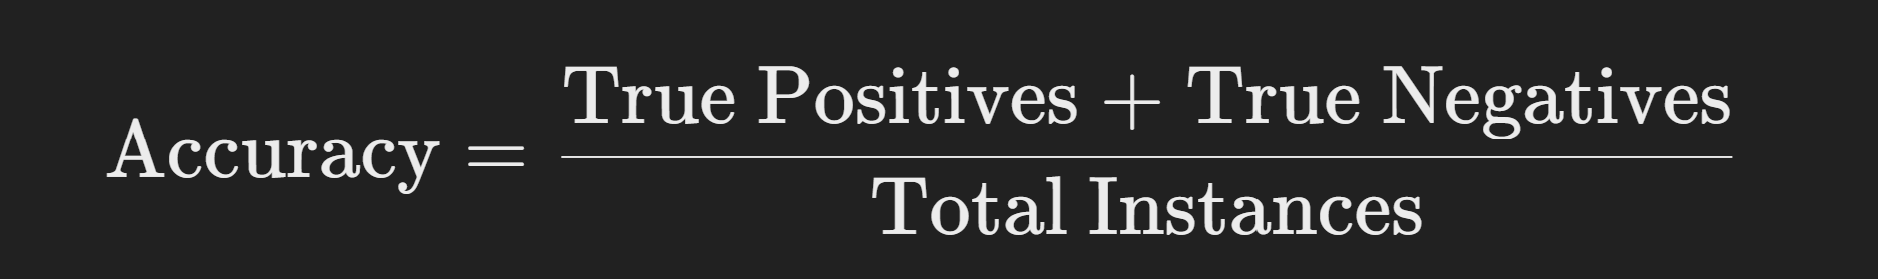

Here, accuracy helps us gauge the general correctness of our model. However, because our dataset is imbalanced (fraudulent transactions are rare compared to legitimate ones), accuracy alone may not fully capture model performance. A high accuracy score could simply indicate that the model is biased toward the majority class (legitimate transactions), potentially missing many fraudulent cases.

**Confusion Matrix and Classification Report:**

The Confusion Matrix provides a breakdown of the model's performance across the different classes (fraudulent and non-fraudulent transactions). It includes:

True Positives (TP): Correctly identified fraud cases.

True Negatives (TN): Correctly identified legitimate cases.

False Positives (FP): Legitimate cases incorrectly identified as fraud (Type I error).

False Negatives (FN): Fraud cases incorrectly identified as legitimate (Type II error).

A model with low FP and FN values is preferable in fraud detection, as FNs imply missed fraud cases, and FPs could cause customer inconvenience due to false fraud alerts.

The Classification Report provides additional metrics beyond accuracy:

**Precision:** The ratio of TP to TP + FP, indicating how often a predicted fraud label is correct. Precision is important when we want to minimize FPs.
Recall (Sensitivity): The ratio of TP to TP + FN, measuring how well the model captures actual fraud cases. High recall is crucial in fraud detection to minimize FNs.
F1-score: The harmonic mean of precision and recall, providing a balanced view when there's a trade-off between these two metrics.
By examining the confusion matrix and classification report, we gain insights into the model's performance across both classes. Together with accuracy, these metrics allow us to understand the model’s strengths and weaknesses in identifying fraud, which is essential for determining its real-world effectiveness and reliability.






In [8]:
from sklearn.metrics import accuracy_score

# Predict on test set and evaluate
y_pred_test_xgb = xgb_model.predict(X_test)

# Calculate test accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
print("Test Accuracy (XGBoost):", accuracy_xgb)

# Confusion Matrix and Classification Report
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)
class_report_xgb = classification_report(y_test, y_pred_test_xgb)

print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("Classification Report (XGBoost):\n", class_report_xgb)

Test Accuracy (XGBoost): 0.9994382219725431
Confusion Matrix (XGBoost):
 [[56855    11]
 [   21    75]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.78      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

